# Hotel Booking Cancellation Prediction
## Data Wrangling

### **Imports**

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to remove warnings
import warnings
warnings.filterwarnings('ignore')

### **Data Loading and Joining**

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
working_dir = "/content/drive/MyDrive/hotel-booking-cancellation-prediction/data/"
h1 = pd.read_csv(working_dir + "raw/h1.csv")
h2 = pd.read_csv(working_dir + "raw/h2.csv")

In [ ]:
h1.head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
h2.head(5)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


Adding hotel name column to h1 and h2, then combining datasets

In [ ]:
h1.insert(0, column = 'hotel_name', value = "Resort Hotel")
h2.insert(0, column = 'hotel_name', value = "City Hotel")

hotels = h1.append(h2)
hotels.head(5)

,hotel_name,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print("dataset shape => ", hotels.shape)

dataset shape =>  (119390, 32)


### **Data Organization**

In [ ]:
hotels.columns

Index(['hotel_name', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

Improving feature names readability

In [ ]:
# updating columns names
new_cols = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

hotels.columns = new_cols
hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# check data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal             

In [ ]:
# change type of categorical data
cat_cols = ['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                     'is_repeated_guest', 'reserved_room_type','assigned_room_type', 'deposit_type', 'agent','company',
                     'customer_type','reservation_status']

hotels['reservation_status_date'] = pd.to_datetime(hotels['reservation_status_date'])

for i in new_cols:
    if i in cat_cols:
        hotels[i] = hotels[i].astype('object')

In [ ]:
# check updated data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64 

### **Data Definition and Univariate Analysis**

### Feature descriptions -
0. **hotel** - The 2 hotels from Portugal: "Resort Hotel" and "City Hotel"
1. **is_canceled** - Value indicating if the booking was canceled (1) or not (0)
2. **lead_time** - Number of days that elapsed between the entering date of booking into the PMS(Property Management System) and the arrival date
3. **arrival_date_year** - Year of arrival date
4. **arrival_date_month** - Month of arrival date with 12 categories: “January” to “December”
5. **arrival_date_week_number** - Week number of the arrival date
6. **arrival_date_day_of_month** - Day of arrival date
7. **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8. **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
9. **adults** - Number of adults
10. **children** - Number of children
11. **babies** - Number of babies
12. **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
     - Undefined/SC – no meal package;
     - BB – Bed & Breakfast;
     - HB – Half board (breakfast and one other meal – usually dinner);
     - FB – Full board (breakfast, lunch and dinner)
13. **country** - Country of origin. Categories are represented in the [ISO 3155–3:2013](https://www.iso.org/standard/63547.html) format
14. **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
15. **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
17. **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
18. **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking
19. **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons
20. **assigned_room_type** - Code for the type of room assigned to the booking
21. **booking_changes** - Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
22. **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
     - No Deposit – no deposit was made;
     - Non Refund – a deposit was made in the value of the total stay cost;
     - Refundable – a deposit was made with a value under the total cost of stay
23. **agent** - ID of the travel agency that made the booking
24. **company** - ID of the company/entity that made the booking or responsible for paying the booking
25. **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer
26. **customer_type** - Type of booking, assuming one of four categories:
     - Contract - when the booking has an allotment or other type of contract associated to it;
     - Group – when the booking is associated to a group;
     - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
     - Transient-party – when the booking is transient, but is associated to at least other transient booking
27. **adr** - The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day
28. **required_car_parking_spaces** - Number of car parking spaces required by the customer
29. **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
30. **reservation_status** - Reservation last status, assuming one of three categories:
      - Canceled – booking was canceled by the customer;
      - Check-Out – customer has checked in but already departed;
      - No-Show – customer did not check-in and did inform the hotel of the reason why
31. **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### Univariate Analysis
- deeper look into the features existent in our data
- looking at the shape of distributions, ranges of values and outliers

In [ ]:
# numerical features summary
hotels.describe(exclude='object', datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119386.0,0.10389,0.0,0.0,0.0,0.0,10.0,0.398561
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


Some conclusions based on the summary of numerical features:

- 37.04% cancelation rate for the two hotels
- Average lead_time is 104 days, so on average it takes more than 3 months from the booking date until the arrival date
- Surprisingly long stays (19 weekend nights and 50 week nights)
- Surprisingly large reservations groups (55 adults, or 10 children and 10 babies)
- Unexpected high number of previous_cancellations for one record = 26

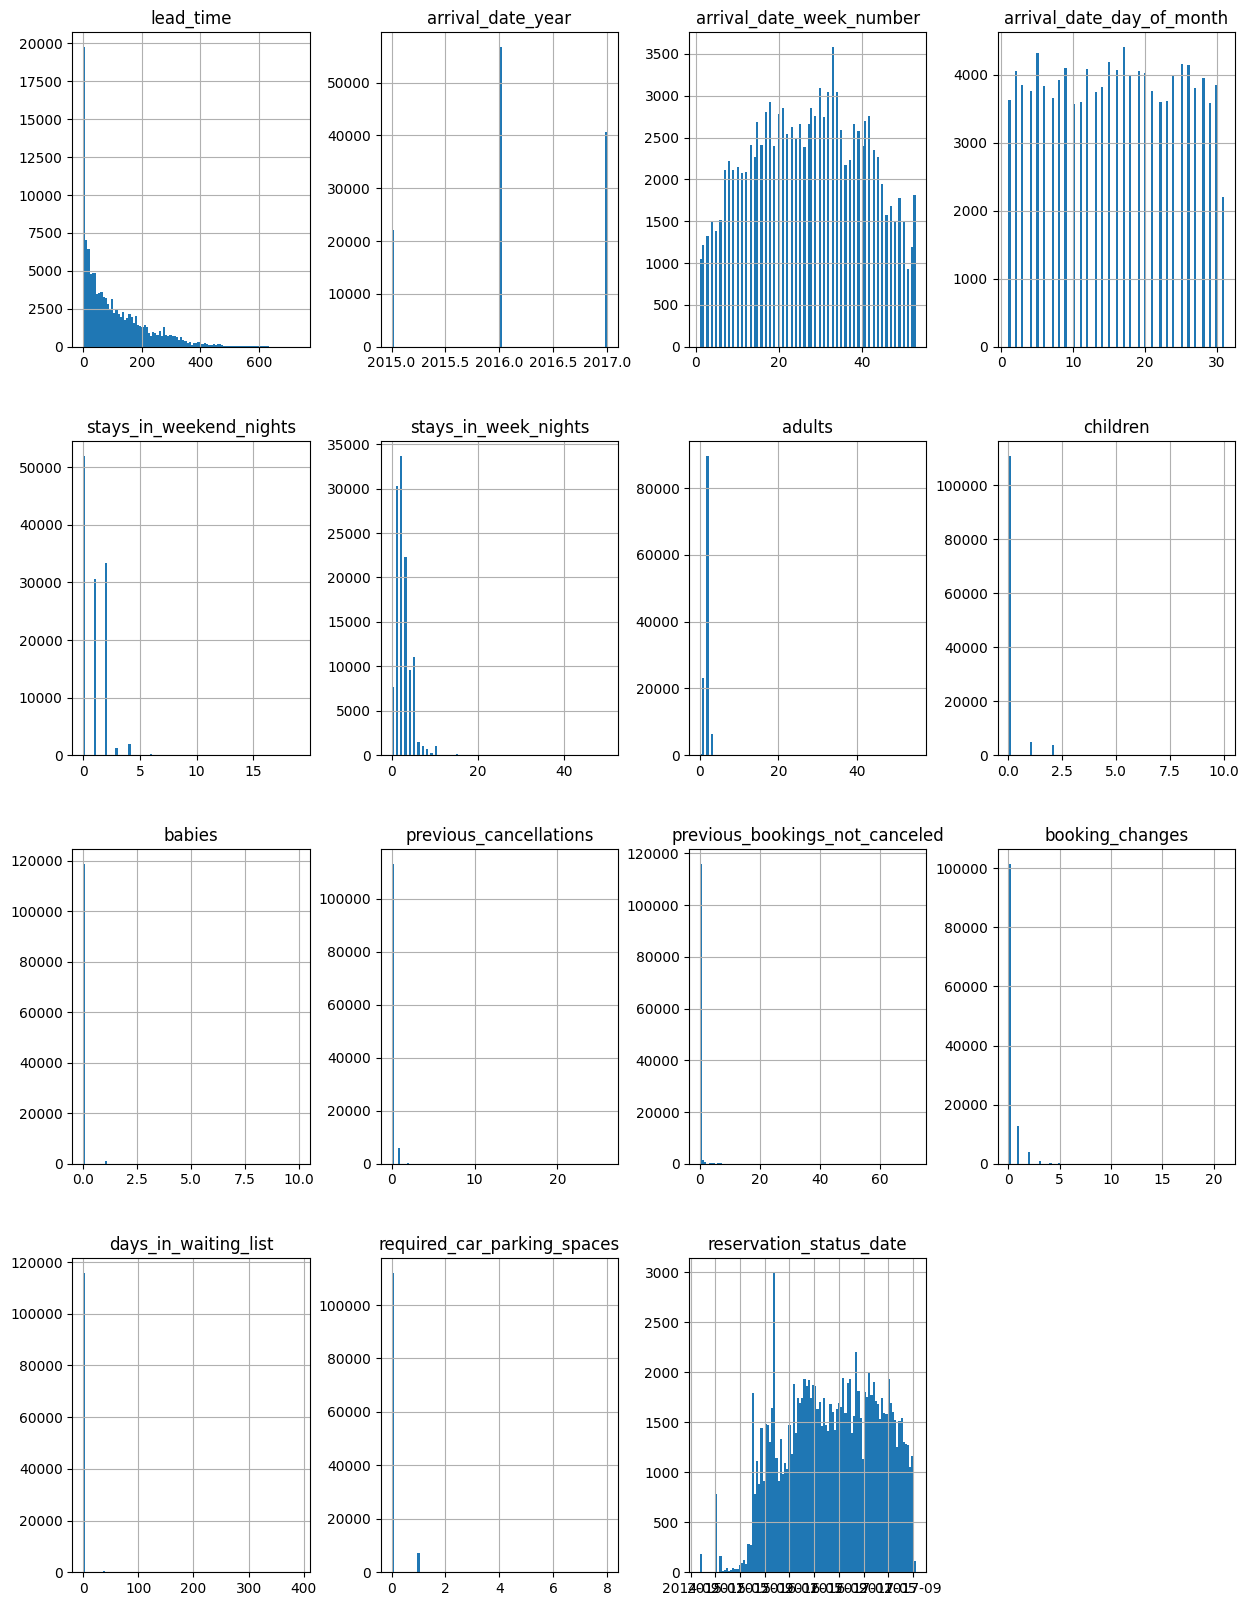

In [ ]:
# plotting histogram for numeric features
numeric_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                    'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','required_car_parking_spaces',
                    'reservation_status_date']

hotels[numeric_features].hist(figsize=(15,20), bins = 100)

plt.show()

There are a few features with values distributed somewhat uniformely, like lead_time, arrival_date_year, arrival_date_week_number or arrival_date_day_of_month, and other features have majority of their values towards 0 and some outliers.

#### Analyzing outliers in numerical features
- stays_in_weekend_nights - values as high as 19  
- stays_in_week_nights - values as high as 50
- adults - values as high as 55
- babies - values as high as 10  
- children - values as high as 10
- required_car_parking_spaces - values as high as 8

In [ ]:
# exploring very long stay in hotels
hotels.sort_values(by = 'stays_in_weekend_nights', ascending = False).head().T

,14038,14037,9839,61734,33924
hotel,Resort Hotel,Resort Hotel,Resort Hotel,City Hotel,Resort Hotel
is_canceled,0,0,1,0,0
lead_time,126,113,322,140,71
arrival_date_year,2016,2015,2017,2016,2017
arrival_date_month,July,August,January,September,January
arrival_date_week_number,28,31,2,39,2
arrival_date_day_of_month,5,1,10,22,10
stays_in_weekend_nights,19,18,16,16,16
stays_in_week_nights,50,42,40,41,40
adults,1,1,2,0,2


Seem to be fine as number of weekend nights match in length the number of week nights, also 4 out of these 5 bookings went through, so these are valid entries.

In [ ]:
# exploring high occupancy reservations
hotels.sort_values(by = 'adults', ascending = False).head(10).T

,2173,1643,1539,1917,1962,2003,1752,2164,1587,1884
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,1,1,1,1,1,1,1,1,1,1
lead_time,338,336,304,349,352,354,340,361,333,347
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,October,September,September,September,September,September,September,October,September,September
arrival_date_week_number,41,37,36,39,39,39,37,40,36,38
arrival_date_day_of_month,4,7,3,21,24,26,12,3,5,19
stays_in_weekend_nights,2,1,0,1,1,2,2,2,2,2
stays_in_week_nights,0,2,3,3,3,5,5,5,5,5
adults,55,50,40,27,27,26,26,26,26,26


- These 10 reservations were always canceled
- Number of adults were between 55 and 26, they were all groups i.e. no babies or children, and the lead_time was always over 300 days
- These were not errors in entries and these were all real bookings that got canceled
- Having up to 55 adults in a booking that then gets canceled is a huge missed opportunity for any hotel because it can mean around 20 rooms on hold, so these occurences must be caught in time and dealt with
- Furthermore, having one of these reservations canceled is bad, but having all the top 10 highest booked reservations canceled is really going to affect the business revenue

In [ ]:
# exploring high number of babies in reservations
hotels.sort_values(by = 'babies', ascending = False).head().T

,6559,38596,54003,64291,33332
hotel,City Hotel,City Hotel,City Hotel,City Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,37,11,4,19,31
arrival_date_year,2016,2015,2016,2017,2017
arrival_date_month,January,October,July,January,February
arrival_date_week_number,3,42,31,2,8
arrival_date_day_of_month,12,11,27,8,19
stays_in_weekend_nights,0,2,0,2,1
stays_in_week_nights,2,1,4,2,0
adults,2,1,2,2,2


These entries seem to be accurate as well. Number of adults being 2 and 1. So it is possible to have a large group of children accompanied by one or two adults. Most important, all the top 5 entries went through, so they most certainly were good valid entries.

In [ ]:
# exploring high number of children in reservations
hotels.sort_values(by = 'children', ascending = False).head().T

,328,76772,924,79010,66327
hotel,Resort Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,1,0,0,0,0
lead_time,55,14,1,0,3
arrival_date_year,2015,2017,2015,2017,2017
arrival_date_month,July,July,August,August,February
arrival_date_week_number,29,30,33,35,8
arrival_date_day_of_month,12,24,10,29,22
stays_in_weekend_nights,4,1,1,0,0
stays_in_week_nights,10,1,1,1,3
adults,2,0,0,2,2


Only 1 booking with an unusual 10 children in it, and it was a No-Show but the customer type is a Contract customer, so it is likely to be a valid entry as well. The rest of the 4 top entries have 3 children, which is not unusual.

In [ ]:
# exploring high number of required_car_parking_spaces in reservations
hotels.sort_values(by = 'required_car_parking_spaces', ascending = False).head().T

,29045,29046,62702,38117,70752
hotel,Resort Hotel,Resort Hotel,City Hotel,Resort Hotel,City Hotel
is_canceled,0,0,0,0,0
lead_time,26,138,13,205,30
arrival_date_year,2017,2017,2016,2017,2017
arrival_date_month,March,March,December,June,April
arrival_date_week_number,11,12,50,26,17
arrival_date_day_of_month,14,19,5,26,29
stays_in_weekend_nights,0,2,1,3,2
stays_in_week_nights,5,2,0,10,1
adults,2,2,1,2,2


2 bookings with a high number, 8, the rest of the top are having 3 parking spaces, which is within normal limits. Looking at the details, we can see they are a week apart, and the customers are from Austria, Transient-Party, and Corporate. So these entries are likely valid.

In [ ]:
# exploring high number of adr values
hotels.sort_values(by = 'adr', ascending = False).head().T

,8455,71343,15083,63852,13142
hotel,City Hotel,City Hotel,Resort Hotel,City Hotel,Resort Hotel
is_canceled,1,0,0,0,1
lead_time,35,0,1,81,378
arrival_date_year,2016,2017,2015,2016,2017
arrival_date_month,March,May,July,December,August
arrival_date_week_number,13,19,29,53,31
arrival_date_day_of_month,25,9,15,31,1
stays_in_weekend_nights,0,0,0,1,4
stays_in_week_nights,1,1,1,1,10
adults,2,1,2,2,2


5400 values is surely an outlier and seems an error, more than 10 times bigger than the second biggest value.

In [ ]:
hotels = hotels[hotels.adr<5000]
hotels.describe().adr

count    119389.000000
mean        101.786744
std          48.153554
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

For conclusion, we saw that these outlier values don't seem to be input errors, but they were extreme cases. The only outlier that we removed was the extremely high adr value. Also, there were some interesting trends and correlations that we found.

#### Categorical features analysis


In [ ]:
categ_features = hotels.describe(include = 'object').T
categ_features['% of 1st categ'] = (categ_features['freq']/categ_features['count']*100).astype('int64')

categ_features

,count,unique,top,freq,% of 1st categ
hotel,119389,2,City Hotel,79329,66
arrival_date_month,119389,12,August,13877,11
meal,119389,5,BB,92309,77
country,118901,177,PRT,48589,40
market_segment,119389,8,Online TA,56477,47
distribution_channel,119389,5,TA/TO,97869,81
is_repeated_guest,119389,2,0,115579,96
reserved_room_type,119389,10,A,85993,72
assigned_room_type,119389,12,A,74052,62
deposit_type,119389,3,No Deposit,104641,87


Some conclusions based on the summary of the categorical features:
- August was the month with most bookings
- Portugal was the residence country for most visitors, but what is surprising is that people from 177 countries visited one of the 2 hotels in the 2 year period
- It is surprising that 115580 of the 119390 records are new customers (96%)  
- 94% of bookings are not made by the company
- 75% of customers are transient

#### Categorical features Vs Target feature(is_canceled) analysis

In [ ]:
def graph_feature(feature, list_values):
    sns.catplot(x=feature, hue = 'is_canceled', kind="count", data=hotels, order = list_values, height=5, aspect=14/5)
    plt.title('{} Vs is_canceled'.format(feature))
    plt.show()

def graph_percentage(feature, list_values):
    plots = hotels.groupby(by = feature).describe().is_canceled['mean'].plot.bar(color = 'g')
    for bar in plots.patches:
        plots.annotate('{:.2%}'.format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

    plt.xticks(np.arange(len(list_values)), list_values, rotation = 0)
    plt.ylabel('Percent canceled')
    plt.title('Percentage of canceled Bookings per {}'.format(feature))

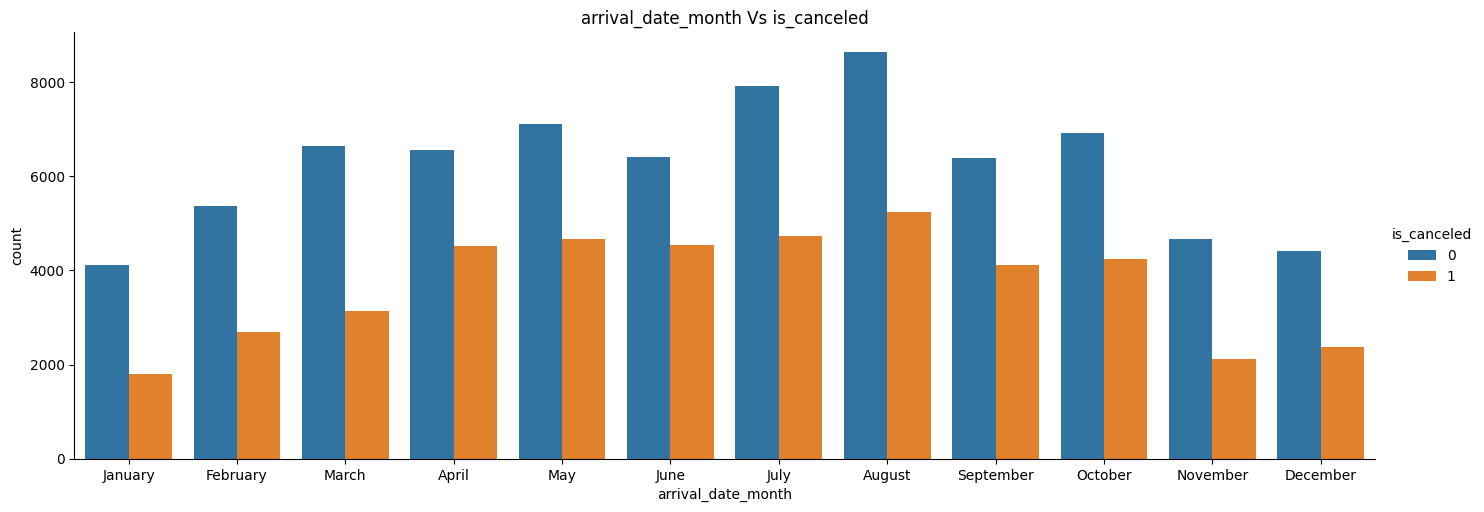

In [ ]:
# check for any correlations between the month of reservations and cancelations, and the months with the highest reservations
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

graph_feature("arrival_date_month", months_order)

- Winter months see less bookings, while July and August are the 2 months with most bookings.

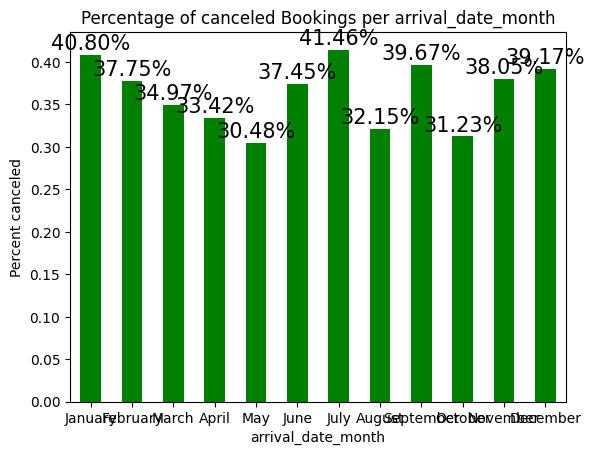

In [ ]:
# months with highest percentage of canceled bookings
graph_percentage('arrival_date_month', months_order)

- Surprisingly the months with highest percentage of cancelations are January and July, with over 40%, while May and October have the lowest rate of cancelations, with values under 32%.

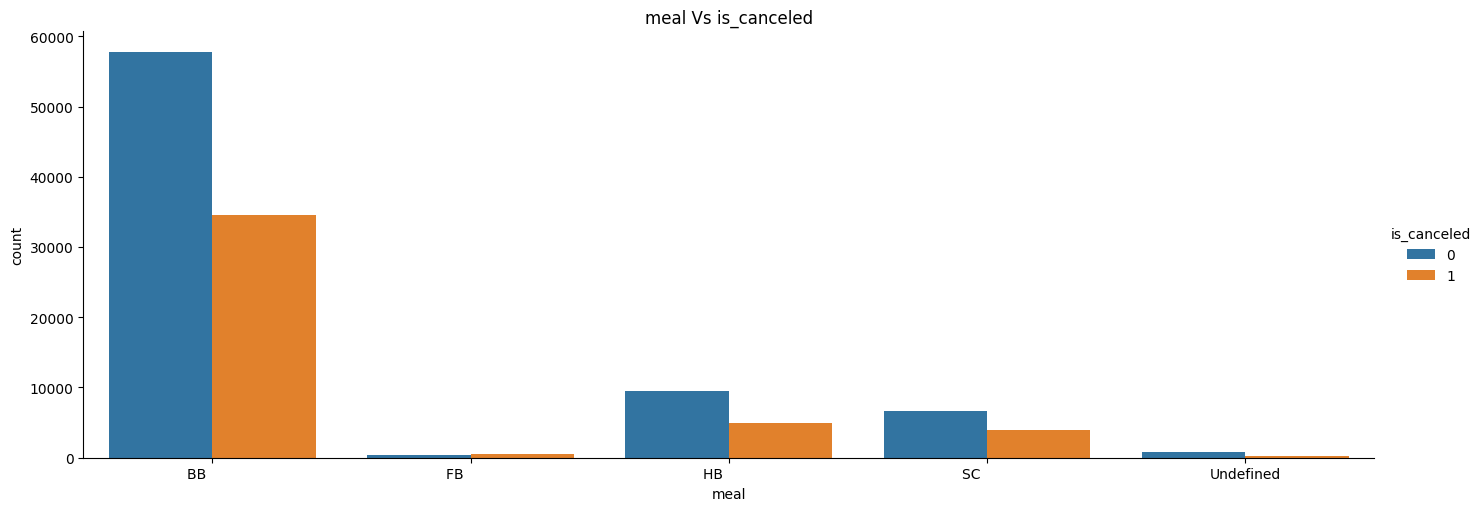

In [ ]:
# meal types preffered by customers and if any relation between meals and cancelations
meals = ['BB', 'FB', 'HB', 'SC', 'Undefined']
sns.catplot(x="meal", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('meal Vs is_canceled')
plt.show()

- Most common meal type is BB(Bed and Breakfast).

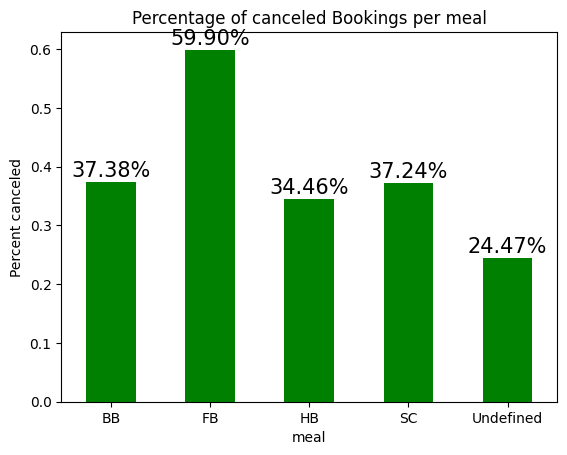

In [ ]:
graph_percentage('meal', meals)

- There is higher tendancy to have a cancelation between customers that have a Full Board type of meal on their reservations(60% cancelations), while all other meal types have under 38% cancelation rates.

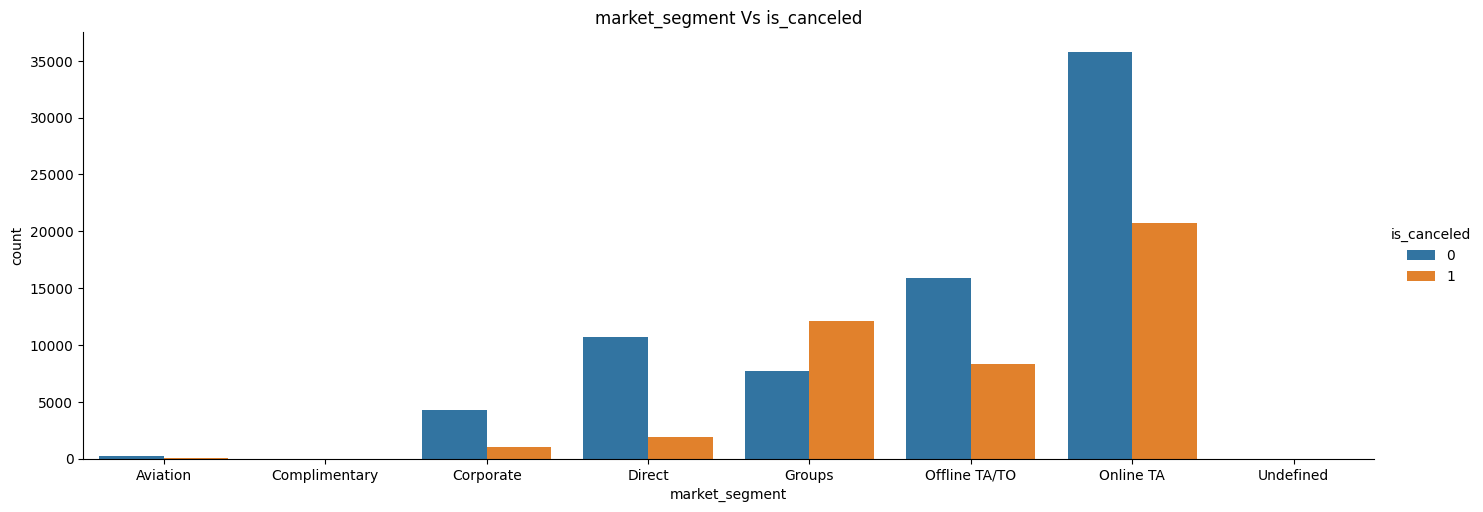

In [ ]:
# where are customers coming from when referring to market segment and any relation between this and cancelations
market_s = ('Aviation','Complimentary','Corporate','Direct','Groups','Offline TA/TO', 'Online TA','Undefined')

graph_feature('market_segment', market_s)

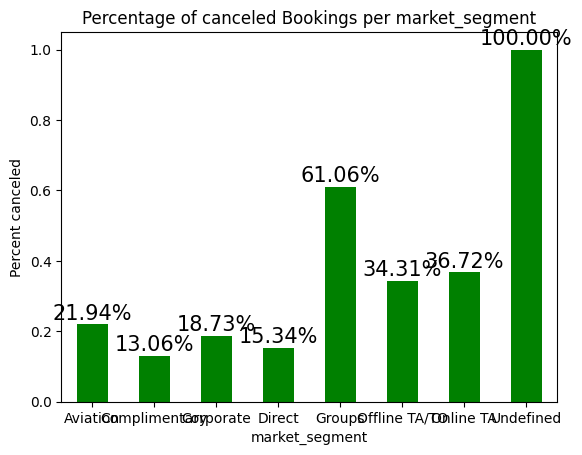

In [ ]:
graph_percentage('market_segment', market_s)

- Groups are more prone to canceling their reservations, with over 60% cancelation rate, and there is an Undefined market_segment, with 100% cancelation rate.

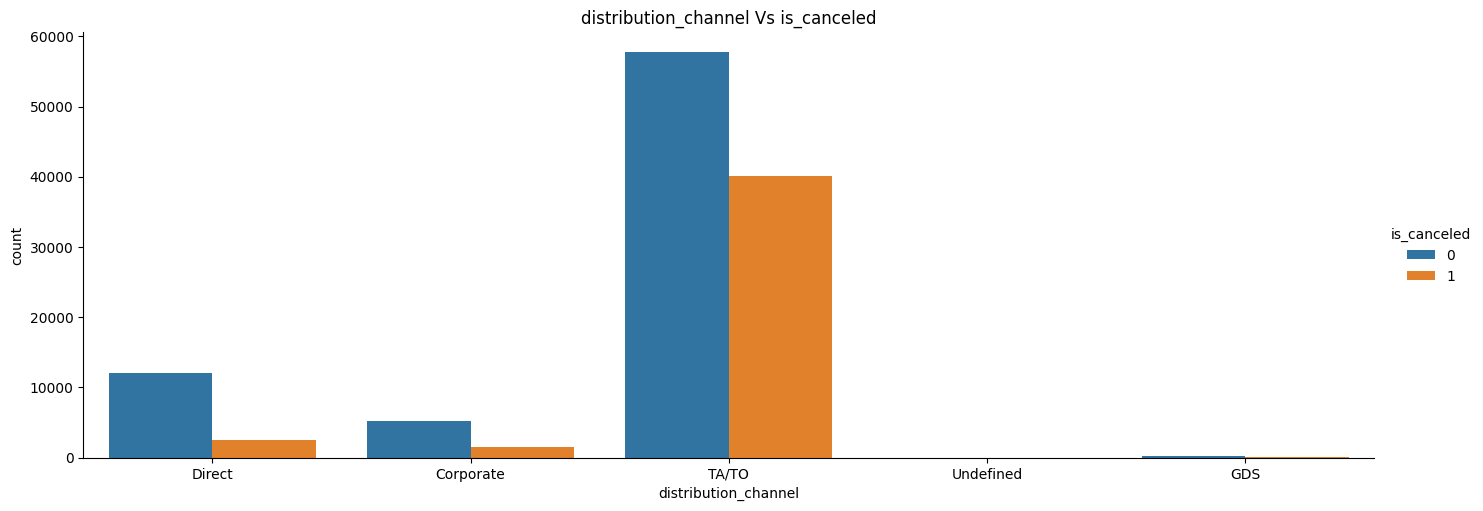

In [ ]:
# most used distribution channels and if these are correlated to cancelations
d_channel = ('Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS')
graph_feature('distribution_channel', d_channel)

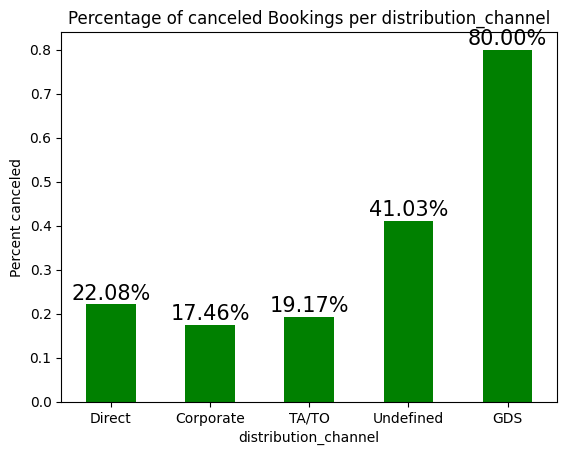

In [ ]:
graph_percentage('distribution_channel', d_channel)

- Highest percentages of cancelations happened for Undefined and GDS channels, but these 2 were very low represented in our data. Corporate has the lowest cancelation rate with under 19%.

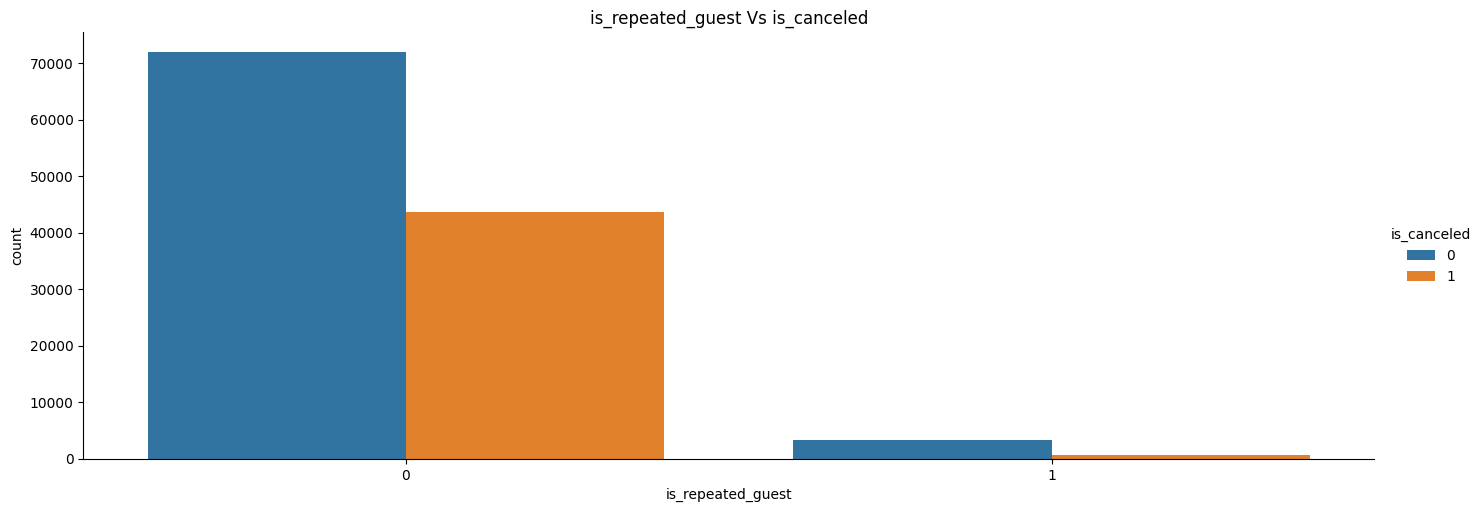

In [ ]:
# how many customers are repeated guest and how much this influence cancelation rate
sns.catplot(x="is_repeated_guest", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('is_repeated_guest Vs is_canceled')
plt.show()

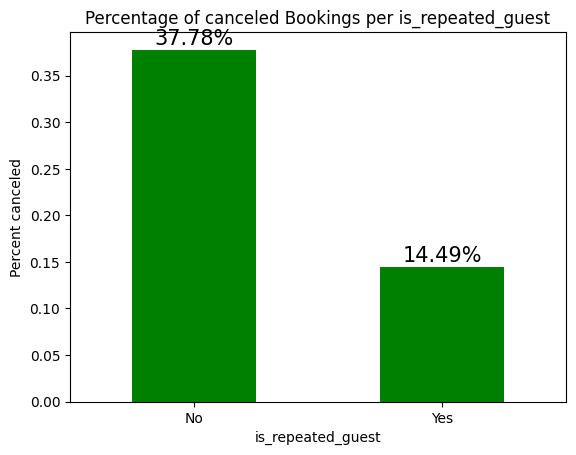

In [ ]:
graph_percentage('is_repeated_guest', ('No','Yes'))

- There are very few customers that are repeated guests. Also, being a repeated customer greatly decreases the rate of cancelations, from over 36% to below 15%.

Text(0.5, 1.0, 'deposit_type Vs is_canceled')

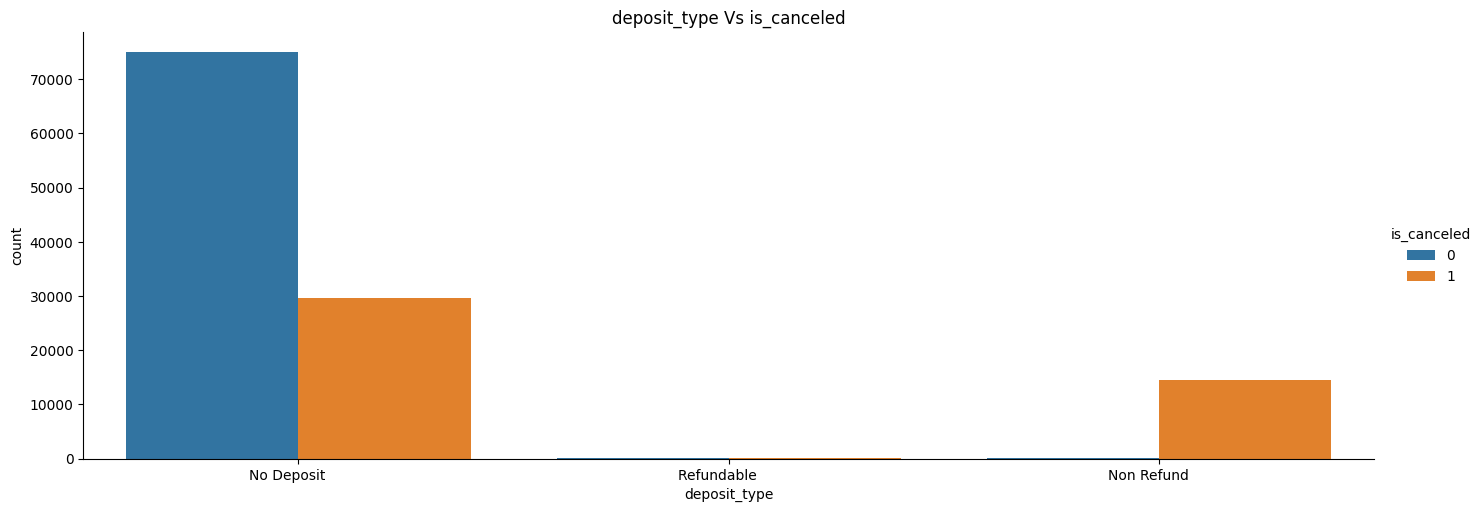

In [ ]:
# most common type of deposit made and is it correlated to cancelations
sns.catplot(x="deposit_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('deposit_type Vs is_canceled')

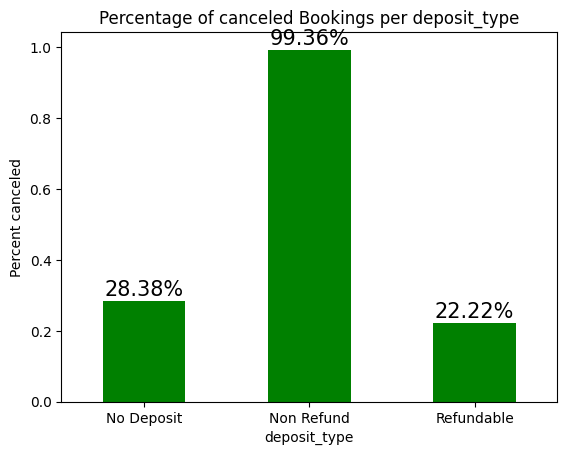

In [ ]:
graph_percentage('deposit_type', ('No Deposit', 'Non Refund','Refundable'))

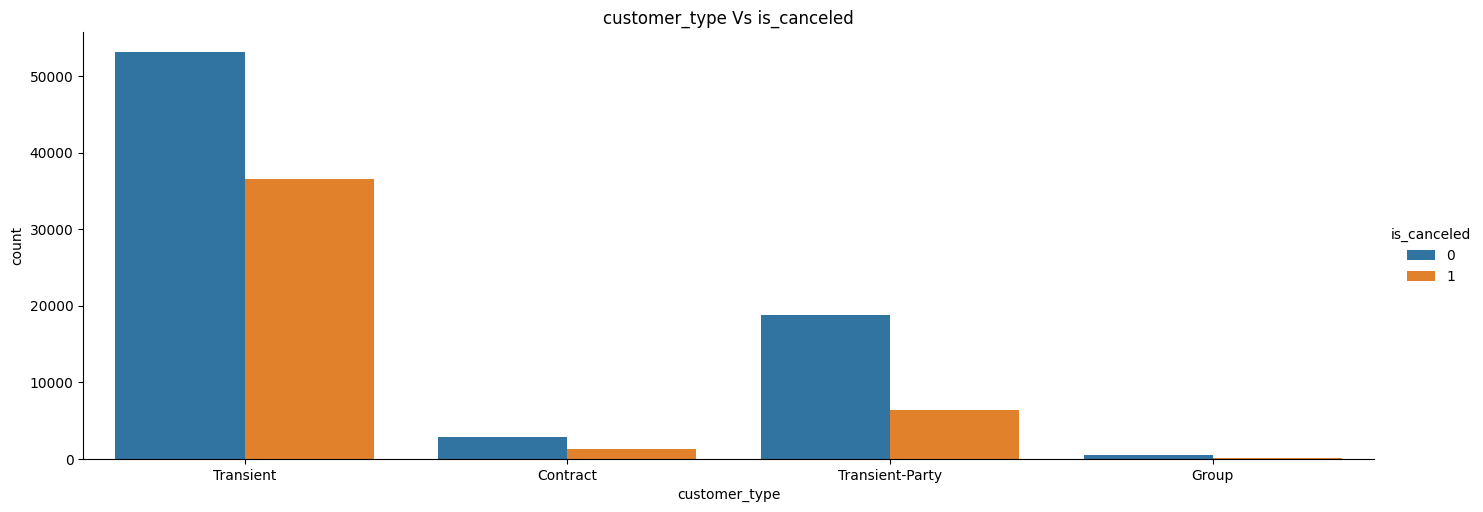

In [ ]:
# most common types of customers, and is there a correlation between target feature and customer_type
sns.catplot(x="customer_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('customer_type Vs is_canceled')
plt.show()

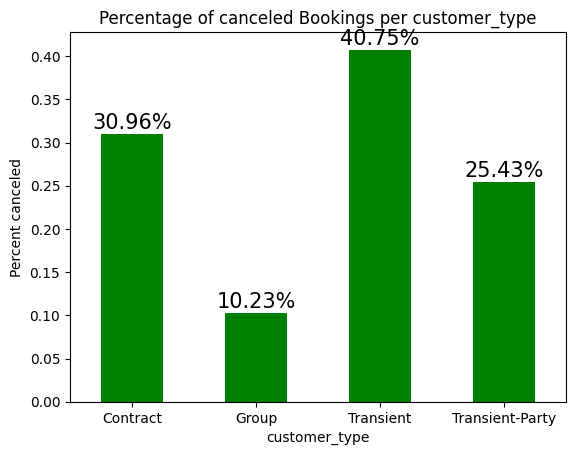

In [ ]:
graph_percentage('customer_type', ('Contract', 'Group', 'Transient', 'Transient-Party'))

- Even after we noticed earlier that 10 of the largest groups had their bookings canceled, the Group type of customers are having the lowest cancelation rate, with just above 10%.

### **Data cleaning**
Dealing with missing values

In [ ]:
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
country,488,0.408748
children,4,0.003350
hotel,0,0.000000
agent,0,0.000000
reserved_room_type,0,0.000000


Replacing 488 missing countries with 'UNK' to avoid losing potential non-Portugal tourist info

In [ ]:
condition1 = hotels.country.isnull()
hotels.loc[hotels.country.isnull(), 'country'] = 'UNK'
hotels.country.isnull().sum()

0

Replacing 4 missing children values with median 0 to handle missing data

In [ ]:
hotels['children'].fillna(value=hotels['children'].median(), inplace=True)
hotels.children.value_counts()

0.0     110799
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
# verifying if there are any missing values left
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0


'agent' and 'company' features had NULL values from initial inspection

In [ ]:
hotels.agent.value_counts().head(10), hotels.company.value_counts().head(10)

(          9    31961
        NULL    16340
         240    13922
           1     7191
          14     3640
           7     3539
           6     3290
         250     2870
         241     1721
          28     1666
 Name: agent, dtype: int64,
        NULL    112592
          40       927
         223       784
          67       267
          45       250
         153       215
         174       149
         219       141
         281       138
         154       133
 Name: company, dtype: int64)

- There are 16340 agent values and 112593 company values missing. This makes sense as there might be some visitors that made the booking without an agent, and most of the people staying in the hotel will be paying for the stay themselves and not their company.
- Replacing those NULL values with no_agent or no_company.

In [ ]:
hotels['agent'] = hotels['agent'].str.replace('NULL', 'no_agent')
hotels['company'] = hotels['company'].str.replace('NULL', 'no_company')
hotels.agent.value_counts().head(15), hotels.company.value_counts().head(15)

(          9        31961
        no_agent    16340
         240        13922
           1         7191
          14         3640
           7         3539
           6         3290
         250         2870
         241         1721
          28         1666
           8         1514
           3         1336
          37         1230
          19         1061
          40         1039
 Name: agent, dtype: int64,
        no_company    112592
          40             927
         223             784
          67             267
          45             250
         153             215
         174             149
         219             141
         281             138
         154             133
         405             119
         233             114
          51              99
          94              87
          47              72
 Name: company, dtype: int64)

Since there are over 300 different values for both agent and company, we will keep just the agent in over 2000 records and the companies from over 500 records.

Renaming rest to Other.

In [ ]:
agent_counts = hotels.agent.value_counts()
mask = hotels['agent'].isin(agent_counts[agent_counts <2000].index)
hotels.loc[mask, 'agent'] = 'Other'
hotels.agent.value_counts()

Other              36636
          9        31961
       no_agent    16340
        240        13922
          1         7191
         14         3640
          7         3539
          6         3290
        250         2870
Name: agent, dtype: int64

In [ ]:
company_counts = hotels.company.value_counts()
mask = hotels['company'].isin(company_counts[company_counts <500].index)
hotels.loc[mask, 'company'] = 'Other'
hotels.company.value_counts()

       no_company    112592
Other                  5086
         40             927
        223             784
Name: company, dtype: int64

So we have reduced number of values to 9 for agents and to 4 for companies.

In [ ]:
# resetting index and deleting the old one, cuz it came from 2 different datasets.
hotels.reset_index(inplace = True)
hotels.drop(columns = 'index', axis = 1, inplace = True)

hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,no_agent,no_company,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,no_agent,no_company,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,no_agent,no_company,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Other,no_company,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,no_company,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,Other,no_company,0,Transient,96.14,0,0,Check-Out,2017-09-06
119385,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,no_company,0,Transient,225.43,0,2,Check-Out,2017-09-07
119386,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,no_company,0,Transient,157.71,0,4,Check-Out,2017-09-07
119387,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,Other,no_company,0,Transient,104.40,0,0,Check-Out,2017-09-07


### **Saving Data**

In [ ]:
hotels.to_csv(working_dir + "interim/hotels_cleaned.csv", index=False)